# Stata Project in Python

First we need to install some libraries.
1. Panda - to import data
    ```bash
    pip install pandas
    pip install pyreadstat
    pip install matplotlib
    pip install scipy
    pip install numpy
    ```
Then we import those libraries

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Now we import the data

In [61]:
pizza_data = pd.read_spss('dataset/Ch5_Pizza.sav')

Let us inspect the data

In [62]:
# Here we can look at the first 5 rows of the data
pizza_data.head()

,College,Qslice,Pslice,Tuition,Psoftdrink,Urban,Residential
0,1.0,9.89,97.3,17.92,98.8,1.0,1.0
1,2.0,12.07,101.2,26.36,95.2,1.0,0.0
2,3.0,13.08,91.0,14.57,110.8,1.0,0.0
3,4.0,13.90,95.0,7.70,91.9,1.0,0.0
4,5.0,8.93,109.6,14.56,100.0,0.0,1.0


In [63]:
# We can also look at the last 5 rows of the data
pizza_data.tail()

,College,Qslice,Pslice,Tuition,Psoftdrink,Urban,Residential
25,26.0,10.02,100.3,18.63,112.1,1.0,0.0
26,27.0,8.91,109.4,6.35,124.3,0.0,0.0
27,28.0,7.96,128.1,13.99,90.2,0.0,1.0
28,29.0,7.89,155.1,8.83,80.5,0.0,0.0
29,30.0,4.96,148.7,13.83,97.1,0.0,1.0


For the *codebook* command in stata, we can use the `describe()` method in pandas, or example:

In [64]:
pizza_data[['Qslice']].describe()

,Qslice
count,30.000000
mean,10.228667
std,2.849129
min,3.180000
25%,8.915000
50%,10.105000
75%,12.012500
max,15.070000


For multiple columns, we can create a list of columns and pass it to the `describe()` method.
Here we create a subset of the matrix.

In [65]:
pizza_data[['Qslice', 'Pslice', 'Tuition']].describe()

,Qslice,Pslice,Tuition
count,30.000000,30.000000,30.000000
mean,10.228667,115.780000,17.079667
std,2.849129,23.696885,5.981331
min,3.180000,75.700000,3.760000
25%,8.915000,100.300000,13.967500
50%,10.105000,111.100000,17.985000
75%,12.012500,129.300000,20.632500
max,15.070000,155.100000,29.260000


#### Few more things to try:
1. Tabulate (To find the frequency of a variable) - `value_counts()`
2. Nolabel (To find the number of missing values) - `isnull().sum()`
3. Histogram (To find the distribution of a variable) - `hist()`
4. Scatterplot (To find the relationship between two variables) - `scatter()`
5. Graph bar (To find the distribution of a variable) - `bar()`

Let's try Histogram:

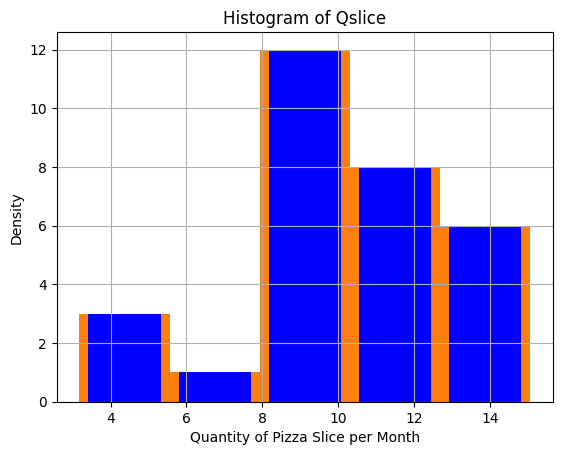

In [66]:
# Histogram of Qslice column
pizza_data['Qslice'].hist()

# If you want to specify interval, you can use the `bins` parameter
pizza_data['Qslice'].hist(bins=5)

# Add title and axis labels
# Now we are trying to plot the histogram using matplotlib
plt.hist(pizza_data['Qslice'], bins=5, rwidth=0.8, color='blue')
plt.title('Histogram of Qslice')
plt.xlabel('Quantity of Pizza Slice per Month')
plt.ylabel('Density')
plt.show()

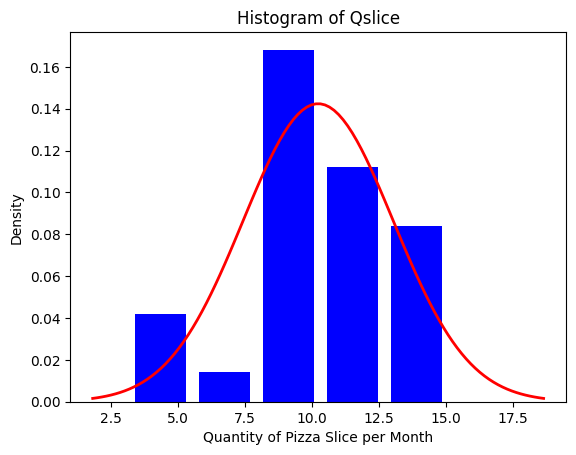

In [69]:
# Now let's try histogram with normal distribution
mu = np.mean(pizza_data['Qslice'])
sigma = np.std(pizza_data['Qslice'])

# plot histogram
n, bins, patches = plt.hist(pizza_data['Qslice'], bins=5, rwidth=0.8, color='blue', density=True)

# plot normal distribution
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2))
plt.plot(x, y, 'r', linewidth=2)

plt.title('Histogram of Qslice')
plt.xlabel('Quantity of Pizza Slice per Month')
plt.ylabel('Density')
plt.show()

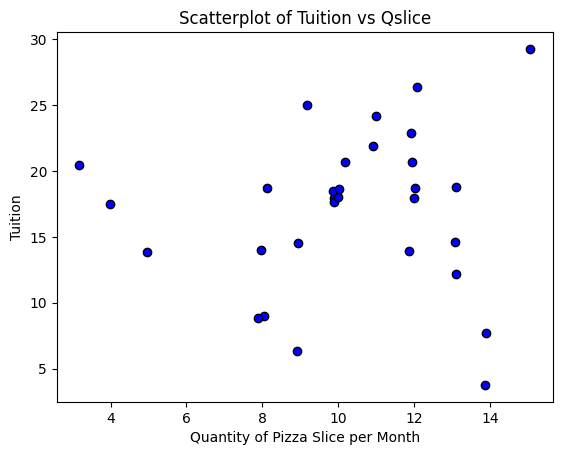

In [72]:
# Creating a scatterplot
plt.scatter(pizza_data['Qslice'], pizza_data['Tuition'], color='blue', edgecolors='black')
plt.title('Scatterplot of Tuition vs Qslice')
plt.ylabel('Tuition')
plt.xlabel('Quantity of Pizza Slice per Month')
plt.show()

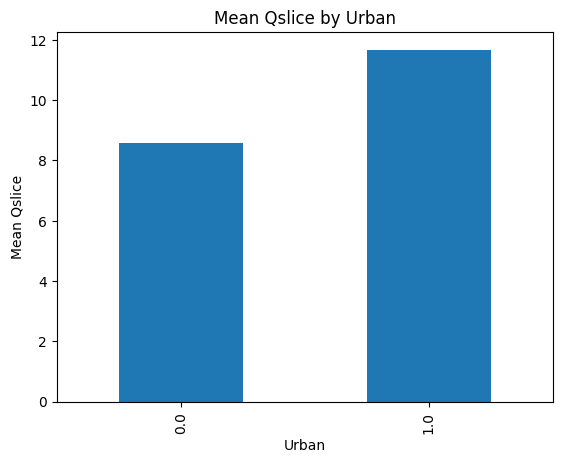

In [73]:
# Let's try bar graphs:

# Create a bar chart with Qslice as the dependent variable and Urban as the independent variable
pizza_data.groupby("Urban").Qslice.mean().plot(kind='bar')

# Add labels and title to the chart
plt.title("Mean Qslice by Urban")
plt.xlabel("Urban")
plt.ylabel("Mean Qslice")

# Show the chart
plt.show()